C:\Users\athre\AppData\Local\Temp\ipykernel_79320\2288206894.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
C:\Users\athre\AppData\Local\Temp\ipykernel_79320\2288206894.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)


Text(0, 0.5, 'Tip')

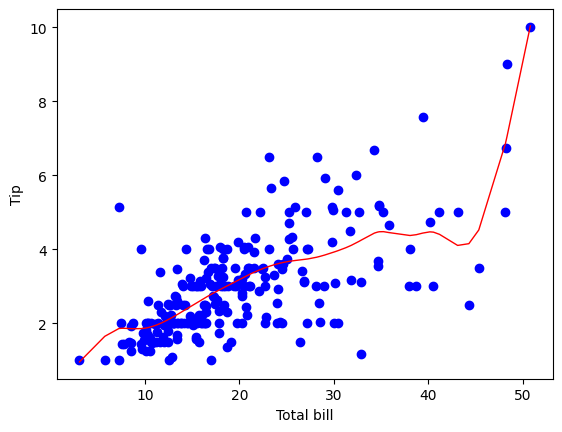

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def kernel(point,xmat, k):
    m,n= np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights


def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W


def localWeightRegression(xmat,ymat,k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred


data = pd.read_csv('data10_tips.csv')

bill = np.array(data.total_bill)
mbill = np.mat(bill) 

tip = np.array(data.tip)
mtip = np.mat(tip)

m= np.shape(mbill)[1]
one = np.mat(np.ones(m))
X= np.hstack((one.T,mbill.T))

ypred = localWeightRegression(X,mtip,2)

SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(bill,tip, color='blue')
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=1)

plt.xlabel('Total bill')
plt.ylabel('Tip')
#plt.show()